In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read CSV
apple = pd.read_csv('AAPL.csv')

In [3]:
# Display head and tail of data
apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-04-17,141.479996,141.880005,140.869995,141.830002,135.750275,16582100
1,2017-04-18,141.410004,142.039993,141.110001,141.199997,135.147308,14697500
2,2017-04-19,141.880005,142.000000,140.449997,140.679993,134.649567,17328400
3,2017-04-20,141.220001,142.919998,141.160004,142.440002,136.334137,23319600
4,2017-04-21,142.440002,142.679993,141.850006,142.270004,136.171432,17320900


In [4]:
apple.set_index('Date');

In [5]:
# Convert Date column to datetime
apple['Date'] = pd.to_datetime(apple['Date'])

In [6]:
# Display the data type for each column
apple.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [7]:
#apple.index = pd.to_datetime(apple.Date)

In [8]:
# Round the decimals
apple.round(2);

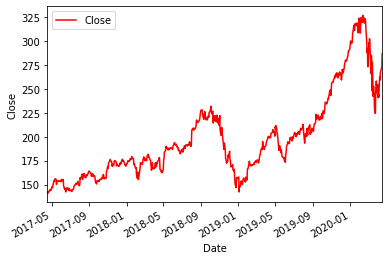

In [9]:
# Plot time series
apple.plot(kind='line', x='Date', y='Close', color='red')

# Specify x-axis label
plt.xlabel('Date')

# Specify y-axis label
plt.ylabel('Close')

# Show plot
plt.show()

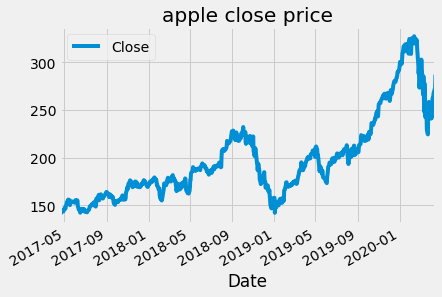

In [10]:
# Specify the plot styles
plt.style.use('fivethirtyeight')

# Plot apple
apple.plot(kind='line', x='Date', y='Close')

plt.title('apple close price')
plt.show()

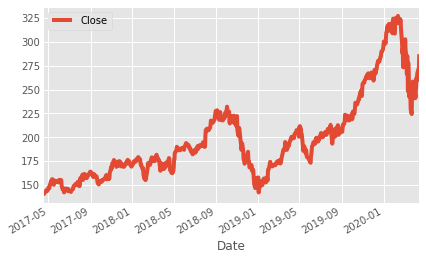

In [11]:
plt.style.use('ggplot')

apple.plot(kind='line', x='Date', y='Close')

plt.show();

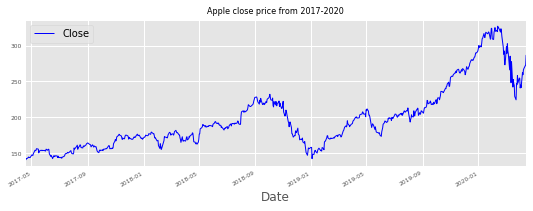

In [12]:
apple.plot(color='blue', x='Date', y='Close', figsize=(8,3), linewidth=1, fontsize=6)

plt.title('Apple close price from 2017-2020', fontsize=8)

plt.show();

In [13]:
apple.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

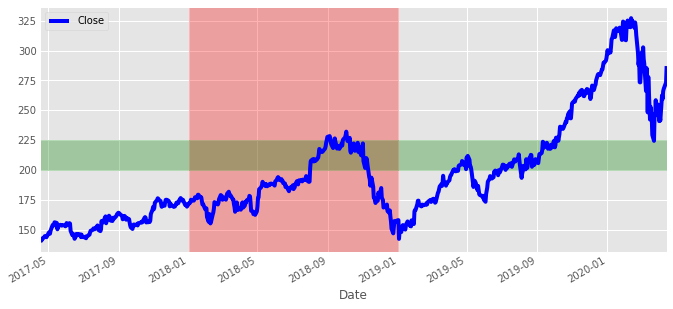

In [14]:
# Plot your apple time series
ax = apple.plot(x='Date', y='Close', figsize=(10,5), color='blue', fontsize=10)

# Add a vertical red shaded region
ax.axvspan('2018-01-01', '2019-01-01', color='red', alpha=0.3)

# Add a horizontal green shaded region
ax.axhspan(225,200,  color='green', alpha=0.3)

plt.show()

In [15]:
# Find missing values
print(apple.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [16]:
# No missing values but here's how you fill missing values

# apple = apple.fillna(method='ffill')

# The argument specifies the type of method you want to use
# bfill(backfilling) = ensuring that missing values are replaced using the NEXT valid observatiion
# ffill(forward-filling) = ensuring that missing values are replaced using the LAST valid observation

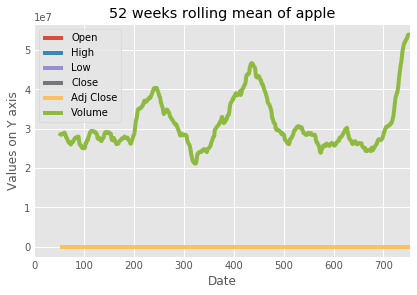

In [17]:
# Plotting aggregates of data
apple_mean = apple.rolling(window=52).mean()

ax = apple_mean.plot()
ax.set_xlabel('Date')
ax.set_ylabel('Values on Y axis')
ax.set_title('52 weeks rolling mean of apple')

plt.show()

In [18]:
# Now you see how I completely botched this one? Cool

In [19]:
df = pd.read_csv('AAPL.csv')

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-04-17,141.479996,141.880005,140.869995,141.830002,135.750275,16582100
1,2017-04-18,141.410004,142.039993,141.110001,141.199997,135.147308,14697500
2,2017-04-19,141.880005,142.000000,140.449997,140.679993,134.649567,17328400
3,2017-04-20,141.220001,142.919998,141.160004,142.440002,136.334137,23319600
4,2017-04-21,142.440002,142.679993,141.850006,142.270004,136.171432,17320900


In [20]:
df1 = df.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'])

In [21]:
df1.dtypes

Date      object
Close    float64
dtype: object

In [22]:
# Bet 
df1['Date'] = pd.to_datetime(df1['Date'])

In [23]:
df1.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [24]:
# Round the decimals
df1 = df1.round(2)

In [25]:
df1.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [26]:
df1.set_index('Date')

,Close
Date,
2017-04-17,141.83
2017-04-18,141.20
2017-04-19,140.68
2017-04-20,142.44
2017-04-21,142.27
...,...
2020-04-07,259.43
2020-04-08,266.07
2020-04-09,267.99


In [27]:
df1.Date.astype(dtype='object')

0      2017-04-17 00:00:00
1      2017-04-18 00:00:00
2      2017-04-19 00:00:00
3      2017-04-20 00:00:00
4      2017-04-21 00:00:00
              ...         
749    2020-04-07 00:00:00
750    2020-04-08 00:00:00
751    2020-04-09 00:00:00
752    2020-04-13 00:00:00
753    2020-04-14 00:00:00
Name: Date, Length: 754, dtype: object

In [28]:
df1.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

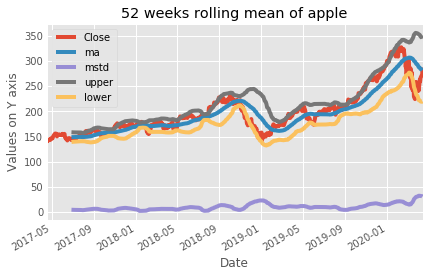

In [29]:
df1['ma'] = df1['Close'].rolling(window=52).mean()
df1['mstd'] = df1['Close'].rolling(window=52).std()

# Add the upper bound column to the ma DataFrame
df1['upper'] = df1['ma'] + (df1['mstd'] * 2)

# Add the lower bound column to the ma DataFrame
df1['lower'] = df1['ma'] - (df1['mstd'] * 2)


ax = df1.plot(x='Date')
ax.set_xlabel('Date')
ax.set_ylabel('Values on Y axis')
ax.set_title('52 weeks rolling mean of apple')

plt.show()

In [30]:
# No clue what happened to std
# This is still incorrect bruh